In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/Vegetta/Vegetta_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
df['description'] = df['description'].fillna("")

In [5]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [6]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 12min 10s, sys: 30 s, total: 12min 40s
Wall time: 13min 6s


In [7]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [8]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('karmaland', 61), ('pubg', 41), ('victoria', 38), ('vegetta', 34), ('resumen', 31), ('of', 29), ('the', 25), ('vs', 22), ('apocalipsisminecraft', 21), ('pirata', 21), ('comenzar', 19), ('aventura', 19), ('us', 19), ('arkadio', 19), ('willy', 17)]
                    Word  Frequency
0              karmaland         61
1                   pubg         41
2               victoria         38
3                vegetta         34
4                resumen         31
5                     of         29
6                    the         25
7                     vs         22
8   apocalipsisminecraft         21
9                 pirata         21
10              comenzar         19
11              aventura         19
12                    us         19
13               arkadio         19
14                 willy         17


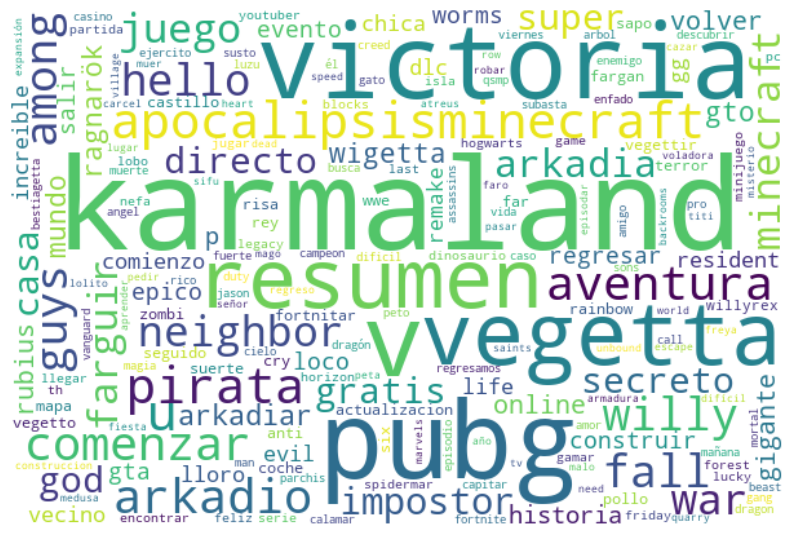

In [9]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [10]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('vegetta', 1416), ('canal', 1266), ('esperar', 601), ('facebook', 446), ('amigo', 444), ('abrazo', 443), ('vídeo', 439), ('twitch', 430), ('twitter', 420), ('querer', 411), ('pagina', 411), ('samuel', 410), ('google', 406), ('social', 405), ('instagram', 405)]
         Word  Frequency
0     vegetta       1416
1       canal       1266
2     esperar        601
3    facebook        446
4       amigo        444
5      abrazo        443
6       vídeo        439
7      twitch        430
8     twitter        420
9      querer        411
10     pagina        411
11     samuel        410
12     google        406
13     social        405
14  instagram        405


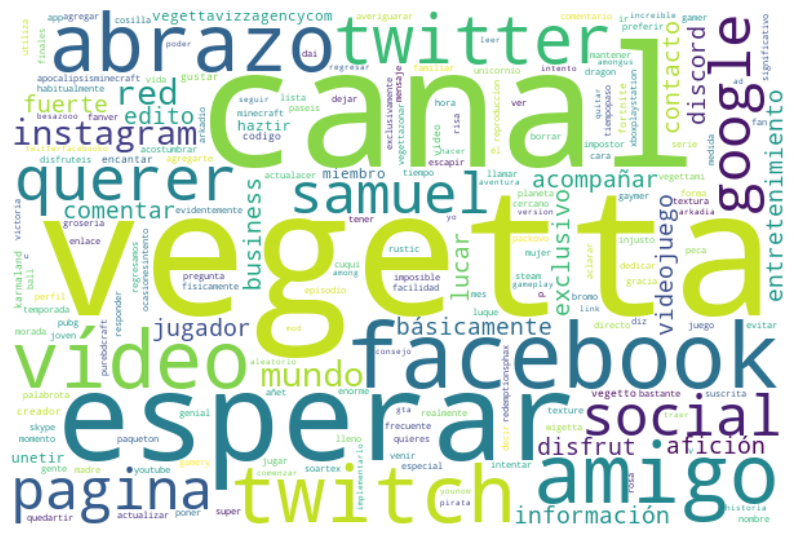

In [11]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
